# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
    * Ground truth - https://www.learnpytorch.io/01_pytorch_workflow/
    

In [1]:
import torch
from torch import nn # nn contains all of PyTorchs building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.2+cu118'

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

### 1. Date (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lost of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation. 

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**



In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # add extra dimension
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (ne of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [5]:
# Create a train/test split
x_train_split = int(0.8 * len(X))
X_train, y_train = X[:x_train_split], y[:x_train_split]
X_test, y_test = X[x_train_split:], y[x_train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize visualize!"

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


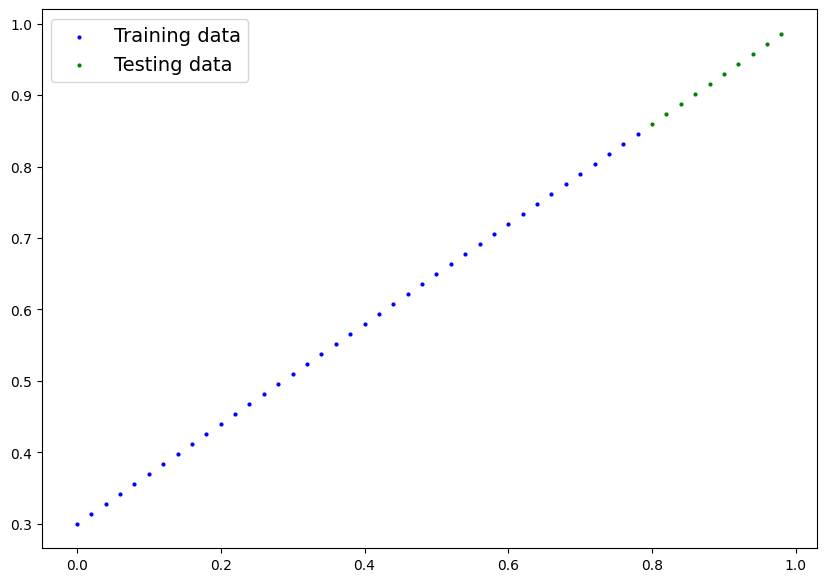

In [7]:
plot_predictions()

### 2. Build model

Our first PyTorch model

This is very exciting... let's do it!


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

How does it do so?

Through two main algorithms
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherets from nn.Module

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float32))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                            requires_grad=True, 
                                            dtype=torch.float32))
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
            return self.weights * x + self.bias # the linear regression formula
        

### PyTorch model building essentials

torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)

torch.nn.Paramater - what parameters shoudl our model try to leanr, often PyTorch layer torch.nn will set these for us

torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward() method

torch.optim - this where the optimizers in PyTorch live they will help with grandiant descent

def forward() - All nn.Module subclassess require you to overwrite forward() method with a computation

### Checking the contents of our PyTorch model

Now we've created our model let's see what's inside...

So we can check our model parameters or what's inside our model using `parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power let's see how well it predicts y_test based on X_test

When we pass data through our model it's going to run it through the `forward()` method

In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

## Also can do it with torch.no_grad(), however inference mode is preferered
# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

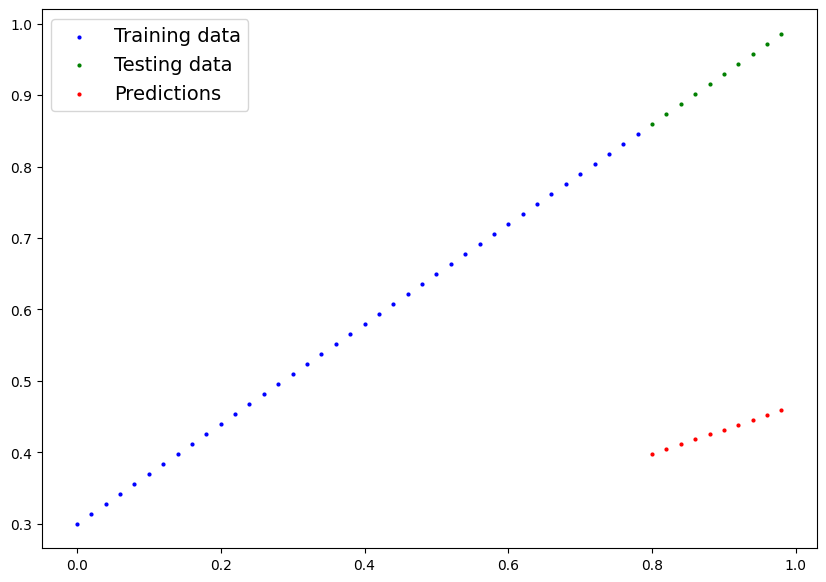

In [13]:
plot_predictions(predictions=y_preds)

### 3. Train Model

The whole idea is for a model to move from some *unknown* parameters (these may be random)to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong you models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case we're going to refer to it as a loss function

Things we need to train:


**Loss function** A functon to measure how wrong your model's predictions are to the idea outputs, lower is better.

**Optimizer** Takes into account the loss of a model and adjusts the model's parameters (eg. weights & bias in our case) to improve the loss function.

- Inside the optimizer you'll have to set two parameters
    - params - the model parameters you'd like to optimize for example `params = model_0.parameters()`
    - li (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)


And specfically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr=1e-2) # lr = learning rate = possibly the most important hyperparameter (you can set these)


### 4. Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (comapre forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gardients of each of the parameters of our models with respect to the loss (**back propagation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try to reduce the loss (**gradient descent**)

In [17]:
torch.manual_seed(42)

# An epoch is one loop through the data
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer zero grad

    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to parameters of the model
    loss.backward()

    # 5. Step the optimizer (prerform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration through the loop


    ## Testing
    model_0.eval() # turns off gradient tracking, Turn off configurations not required for evaluation testing

    with torch.inference_mode(): # turns off gradient tracking and a couple of things not needed for testing
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss 
        test_loss = loss_fn(test_pred, y_test)

    # Print out what happinin
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
torch.tensor(loss_values).cpu().numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

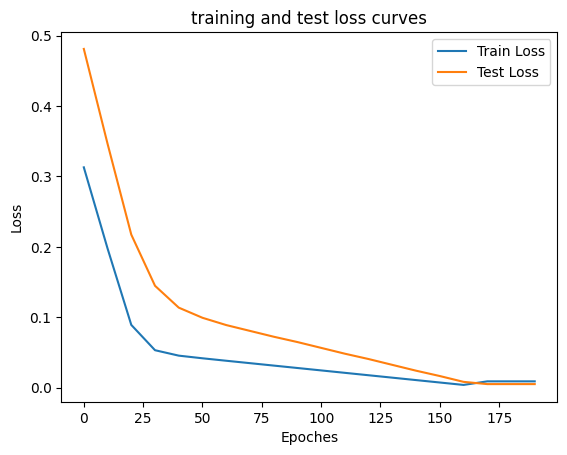

In [20]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.legend()

In [21]:
with torch.inference_mode():
    ypreds_new = model_0(X_test)

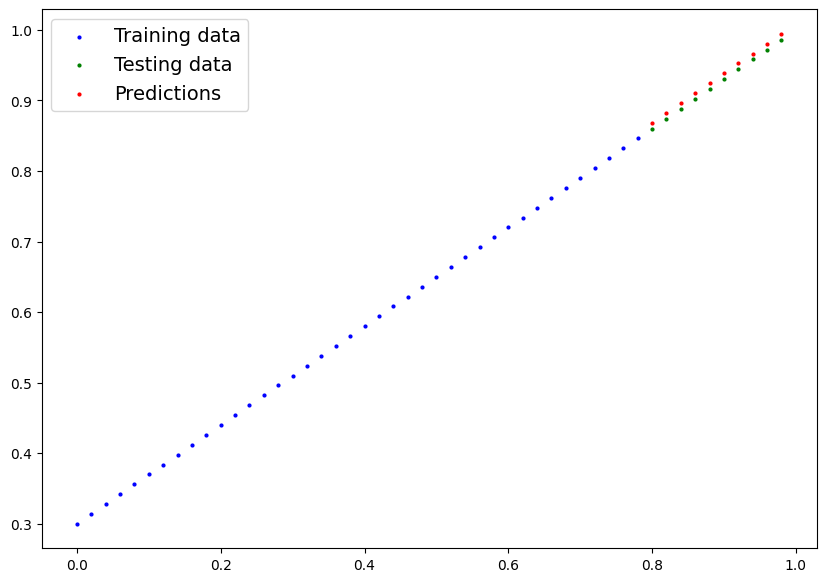

In [22]:
plot_predictions(predictions=ypreds_new)

### Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

Pytorch save and load code: https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [23]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [29]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [30]:
# import PyTorch and matplatlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__


'2.2.2+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, out code will use it (for potentially faster computing).

If no GPU avialable, the code will default to using CPU

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [32]:
# Create some data using the linear regression formula of y = w*X + bias
weight = 0.7 
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

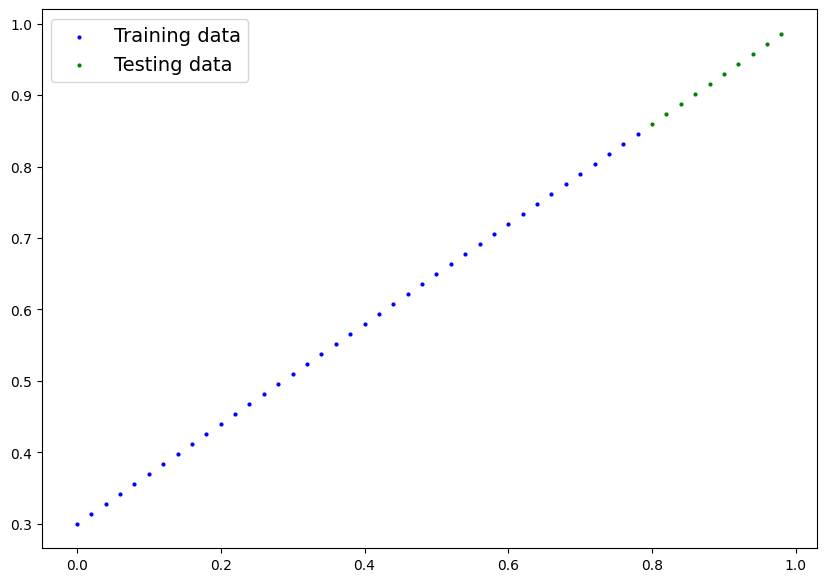

In [34]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model

In [35]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing leayer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [37]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [40]:
# Set up loss function
loss_fn = nn.L1Loss() # same as MAE

optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.01)

In [42]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200


# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer
    optimizer.zero_grad()

    # 4. Perform backpropogation
    loss.backward()

    # Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [43]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [44]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [52]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds




tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

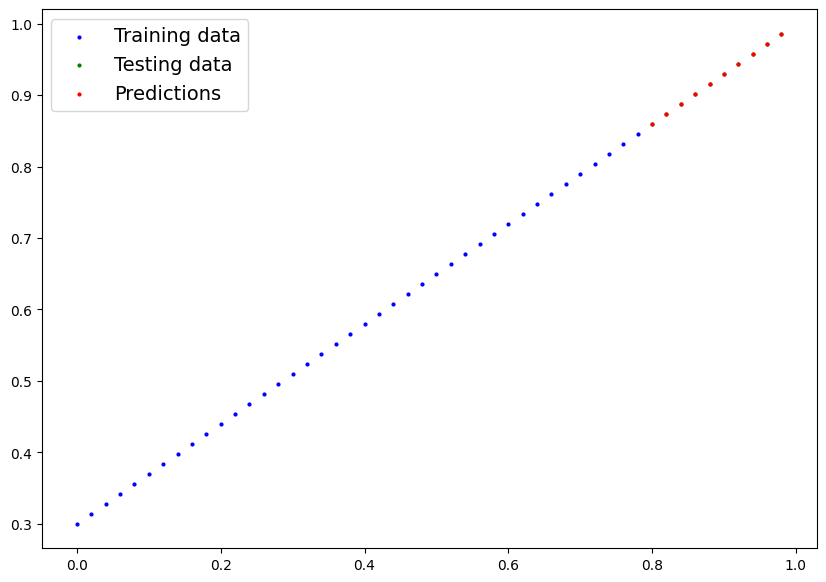

In [54]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving &  loading a trained model

In [56]:
from pathlib import Path

# 1. Create models diectory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saveing model to: {MODEL_SAVE_PATH}")

torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saveing model to: models/01_pytorch_workflow_model_1.pth


In [57]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [58]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [59]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [60]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])